# This is Interactive PyR@TE

### visit our hepforge page !

In [1]:
%pylab inline

%config InlineBackend.figure_format = 'svg'

from IPython.display import HTML

HTML('<iframe src=http://pyrate.hepforge.org/?useformat=mobile width=700 height=350></iframe>')


Populating the interactive namespace from numpy and matplotlib


## 1. Run the code :

### 1.1 command line

In [2]:
%cd ../

/Users/florian/Documents/work/Projects/Pyrate/git/pyrate


In [3]:
%run pyR@TE.py -m ./models/SM.model -gc 






				PyR@TE version 2.0.0  released  ???

			F. Lyonnet, I. Schienbein,

			and F.Staub, A.Wingerter (version 1)


Validating the model...
		...done
Processing the model...
		...done
Creating the instance of the Model: SM, 11.04.2013, by Florian Lyonnet...done

CRITICAL:root:Creating the instance of the Model: SM, 11.04.2013, by Florian Lyonnet...done



 		...Calculation done.

CRITICAL:root: 		...Calculation done.
CRITICAL:root:"
Error in the LateX export, skipping. Contact the authors



"
Error in the LateX export, skipping. Contact the authors
End of the run.

CRITICAL:root:End of the run.


Note that the verbose is minimum, use -v to increase it

### 1.2 Using a .settings file 

In [4]:
#load the pretty printing of sympy 
from sympy import init_printing
init_printing(use_latex=True)

In [5]:
%run pyR@TE.py -f docs/RunDemo.settings






				PyR@TE version 2.0.0  released  ???

			F. Lyonnet, I. Schienbein,

			and F.Staub, A.Wingerter (version 1)


Validating the model...
		...done
Processing the model...
		...done
Creating the instance of the Model: SM, 11.04.2013, by Florian Lyonnet...done

CRITICAL:root:Creating the instance of the Model: SM, 11.04.2013, by Florian Lyonnet...done



 		...Calculation done.

CRITICAL:root: 		...Calculation done.



"
Error in the LateX export, skipping. Contact the authors

CRITICAL:root:"
Error in the LateX export, skipping. Contact the authors



End of the run.

CRITICAL:root:End of the run.


### 2. Examine the results

All the results are stored in RGEs, a list of dictionnary :

In [6]:
RGEs

[{'SU2L': -19*g_SU2L**3/(96*pi**2),
  'SU3c': -7*g_SU3c**3/(16*pi**2),
  'U1': 41*g1**3/(96*pi**2)},
 {'Y_{d}': -5*g1**2*Y_{d}(Qbar_f, dR_f)/(192*pi**2) - 9*g_SU2L**2*Y_{d}(Qbar_f, dR_f)/(64*pi**2) - g_SU3c**2*Y_{d}(Qbar_f, dR_f)/(2*pi**2) + 3*trace(conjugate(Y_d), transpose(Y_d))*Y_{d}(Qbar_f, dR_f)/(32*pi**2) + trace(conjugate(Y_e), transpose(Y_e))*Y_{d}(Qbar_f, dR_f)/(32*pi**2) + 3*trace(conjugate(Y_u), transpose(Y_u))*Y_{d}(Qbar_f, dR_f)/(32*pi**2) + 3*trace(adjoint(Y_d), Y_d)*Y_{d}(Qbar_f, dR_f)/(32*pi**2) + trace(adjoint(Y_e), Y_e)*Y_{d}(Qbar_f, dR_f)/(32*pi**2) + 3*trace(adjoint(Y_u), Y_u)*Y_{d}(Qbar_f, dR_f)/(32*pi**2) + 3*MatM((Y_d, adjoint(Y_d), Y_d), Qbar_f, dR_f)/(32*pi**2) - 3*MatM((Y_u, adjoint(Y_u), Y_d), Qbar_f, dR_f)/(32*pi**2),
  'Y_{e}': -15*g1**2*Y_{e}(Lbar_f, eR_f)/(64*pi**2) - 9*g_SU2L**2*Y_{e}(Lbar_f, eR_f)/(64*pi**2) + 3*trace(conjugate(Y_d), transpose(Y_d))*Y_{e}(Lbar_f, eR_f)/(32*pi**2) + trace(conjugate(Y_e), transpose(Y_e))*Y_{e}(Lbar_f, eR_f)/(32*pi**2) + 3

Note that Qbarf,dRf represents the generation indices of Qbarf,dRf respectively

The different results are accessed via their key, to get a list of all the keys of a dictionary the method keys() can be called

In [7]:
#List of keys
Keys = [el.keys() for el in RGEs]
Keys

[['SU2L', 'U1', 'SU3c'], ['Y_{u}', 'Y_{e}', 'Y_{d}']]

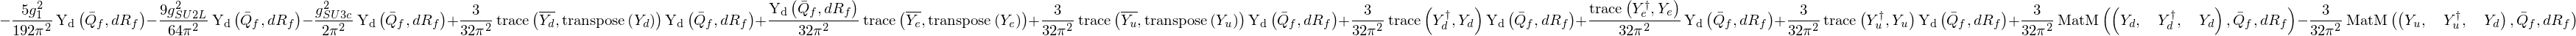

In [8]:
#We can access the Y_d results for instance, first element of the list are the yukawa results
Yd = RGEs[1]['Y_{d}']
Yd

Let's now have a look at the 1 loop beta function for the Y_u parameter and isolate powers of g**2

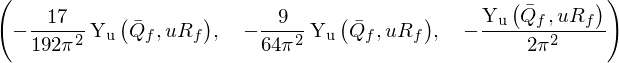

In [9]:
#Get the Y_u result
Yu = RGEs[1]['Y_{u}']
#Declare symbols for the gauge couplings to be able to do the matching 
g1,g2,g3 = symbols('g1 g_SU2L g_SU3c')
#Collect the different power orders
g1sq,g2sq,g3sq = Yu.coeff(g1**2),Yu.coeff(g2**2),Yu.coeff(g3**2)
g1sq,g2sq,g3sq

## 2. Producing Outputs using the Toolbox

### 2.1 Save the Result into a pickle file for later use

In [10]:
#tl is a namespace that we use to avoid confusion
import Toolbox as tl

In [11]:
#For bookeeping purposes one can add a description as optional argument here 
tl.ExportToPickle('./results/demo/Demo.pickle', RGEs, model,description = 'Test file, containing the SM')

Dumping the results in a pickle file...
		...done


### 2.2 Export the results into a LateX File 

In [12]:
#Note that alternatively one can right click on the Equation printed on the screen and click on Show Math as --> Tex command 
#This allows to save equations that have been modified in the notebook
tl.ExportToPickle('./results/demo/Demo.tex', RGEs, model)

Dumping the results in a pickle file...
		...done


### 2.3 Export to a Mathematica File

In [13]:
tl.ExportToMathematica('./results/demo/test.txt',RGEs,model)

writing a Mathematica txt file...
		...done


In [14]:
#This can also be used to translate any expression as long as it is contained in a list of dictionary. For instance to get only the gaugecouplings one can do :
tl.ExportToMathematica('./results/demo/test.OnlyGaugeCouplings.txt',[RGEs[0]],model)

writing a Mathematica txt file...
		...done


### 2.4 Export to a python function

The goal here is to produce a python function that encodes the results of the calculation so that the rges can be solved later on. See section 4.

## 3. Load an existing result and compare it with the SM : 

In [15]:
#load the file we have just created
SMDemo,description = tl.loadmodel('./results/demo/Demo.pickle')
description

'Test file, containing the SM'

In [16]:
#Now we can do the difference of this result with the SM and see that we get zero
#Load the SM
SMres,SMdescription = tl.loadmodel('docs/SM.short.pickle')

In [17]:
#The CompareModels function can be called with two loaded model from pickle or directly using the name of the pickle
res = tl.CompareModels(SMDemo,SMres)
#res contains the different differences if one wants to have a look at it, the structure is : tag,1L,2L
res

[['SU3c', [0], [0]],
 ['Y_u',
  [3*Y_u(Qbar_f, uR_f)*trace(conjugate(Y_d), transpose(Y_d))/2 + Y_u(Qbar_f, uR_f)*trace(conjugate(Y_e), transpose(Y_e))/2 + 3*Y_u(Qbar_f, uR_f)*trace(conjugate(Y_u), transpose(Y_u))/2 - 3*Y_u(Qbar_f, uR_f)*trace(adjoint(Y_d), Y_d)/2 - Y_u(Qbar_f, uR_f)*trace(adjoint(Y_e), Y_e)/2 - 3*Y_u(Qbar_f, uR_f)*trace(adjoint(Y_u), Y_u)/2],
  [0]],
 ['U1', [0], [0]],
 ['Y_e',
  [3*Y_e(Lbar_f, eR_f)*trace(conjugate(Y_d), transpose(Y_d))/2 + Y_e(Lbar_f, eR_f)*trace(conjugate(Y_e), transpose(Y_e))/2 + 3*Y_e(Lbar_f, eR_f)*trace(conjugate(Y_u), transpose(Y_u))/2 - 3*Y_e(Lbar_f, eR_f)*trace(adjoint(Y_d), Y_d)/2 - Y_e(Lbar_f, eR_f)*trace(adjoint(Y_e), Y_e)/2 - 3*Y_e(Lbar_f, eR_f)*trace(adjoint(Y_u), Y_u)/2],
  [0]],
 ['Y_d',
  [3*Y_d(Qbar_f, dR_f)*trace(conjugate(Y_d), transpose(Y_d))/2 + Y_d(Qbar_f, dR_f)*trace(conjugate(Y_e), transpose(Y_e))/2 + 3*Y_d(Qbar_f, dR_f)*trace(conjugate(Y_u), transpose(Y_u))/2 - 3*Y_d(Qbar_f, dR_f)*trace(adjoint(Y_d), Y_d)/2 - Y_d(Qbar_f, dR_f)

In [18]:
#As said above we can pass the files directly 
res2 = tl.CompareModels('./results/demo/Demo.pickle','docs/SM.short.pickle')

In [19]:
dem = tl.loadmodel('docs/Demo2.pickle')

In [20]:
tl.CompareModels(dem,SMres)

[['SU3c', [7*g_SU3c**3], [0]],
 ['Y_u',
  [17*g1**2*Y_u(Qbar_f, uR_f)/12 + 9*g_SU2L**2*Y_u(Qbar_f, uR_f)/4 + 8*g_SU3c**2*Y_u(Qbar_f, uR_f) - 3*Y_u(Qbar_f, uR_f)*trace(adjoint(Y_d), Y_d) - Y_u(Qbar_f, uR_f)*trace(adjoint(Y_e), Y_e) - 3*Y_u(Qbar_f, uR_f)*trace(adjoint(Y_u), Y_u) + 3*MatM((Y_d, adjoint(Y_d), Y_u), Qbar_f, uR_f)/2 - 3*MatM((Y_u, adjoint(Y_u), Y_u), Qbar_f, uR_f)/2],
  [0]],
 ['U1', [-41*g1**3/6], [0]],
 ['Y_e',
  [15*g1**2*Y_e(Lbar_f, eR_f)/4 + 9*g_SU2L**2*Y_e(Lbar_f, eR_f)/4 - 3*Y_e(Lbar_f, eR_f)*trace(adjoint(Y_d), Y_d) - Y_e(Lbar_f, eR_f)*trace(adjoint(Y_e), Y_e) - 3*Y_e(Lbar_f, eR_f)*trace(adjoint(Y_u), Y_u) - 3*MatM((Y_e, adjoint(Y_e), Y_e), Lbar_f, eR_f)/2],
  [0]],
 ['Y_d',
  [5*g1**2*Y_d(Qbar_f, dR_f)/12 + 9*g_SU2L**2*Y_d(Qbar_f, dR_f)/4 + 8*g_SU3c**2*Y_d(Qbar_f, dR_f) - 3*Y_d(Qbar_f, dR_f)*trace(adjoint(Y_d), Y_d) - Y_d(Qbar_f, dR_f)*trace(adjoint(Y_e), Y_e) - 3*Y_d(Qbar_f, dR_f)*trace(adjoint(Y_u), Y_u) - 3*MatM((Y_d, adjoint(Y_d), Y_d), Qbar_f, dR_f)/2 + 3*MatM(

In [21]:
#One can also add some rules for substitutions to carry out at the subtraction time e.g.
#Here we produced a Demo2.pickle file in which the gauge couplings are named differently
res3 = tl.CompareModels('docs/Demo2.pickle','docs/SM.short.pickle')
res3withsubs = tl.CompareModels('docs/Demo2.pickle','docs/SM.short.pickle',[((Symbol('g_SU3'),Symbol('g_SU3c')),(Symbol('g_SU2'),Symbol('g_SU2L')))])

We can see that in the first subtraction the Yukawas are not zero because the gauge couplings have different names. The substitutions in the second allow for a correct identification

In [22]:
res3[1], res3withsubs[1]

(['Y_u',
  [-9*g_SU2**2*Y_u(Qbar_f, uR_f)/4 + 9*g_SU2L**2*Y_u(Qbar_f, uR_f)/4 - 8*g_SU3**2*Y_u(Qbar_f, uR_f) + 8*g_SU3c**2*Y_u(Qbar_f, uR_f)],
  [0]],
 ['Y_u', [0], [0]])

## 4. Numerical Evaluation

### 4.1 Solving the RGEs

In [23]:
#If we try to export the result of our current calculation it will not work because the rges are coupled and therefore
#we need to calculate all of them at the same time. Therefore we recalculate it and add the -a option to have all of them calculated
%run pyR@TE.py -f docs/RunDemo.settings -a






				PyR@TE version 2.0.0  released  ???

			F. Lyonnet, I. Schienbein,

			and F.Staub, A.Wingerter (version 1)


Validating the model...
		...done
Processing the model...
		...done
Creating the instance of the Model: SM, 11.04.2013, by Florian Lyonnet...done

CRITICAL:root:Creating the instance of the Model: SM, 11.04.2013, by Florian Lyonnet...done



WARNING, no fermion anomalous dimension to calculate

CRITICAL:root:WARNING, no fermion anomalous dimension to calculate
CRITICAL:root: 		...Calculation done.



 		...Calculation done.
"
Error in the LateX export, skipping. Contact the authors

CRITICAL:root:"
Error in the LateX export, skipping. Contact the authors



End of the run.

CRITICAL:root:End of the run.


In [24]:
#Now we can export the results using the ExportBetaFunction function from the toolbox (-e option also works)
tl.ExportBetaFunction('./results/demo/BetaFunction.py',model)

Exporting to python function...
		...done


if we look in the results/demo directory we should see BetaFunction.py as well as BetaFunction_SolveRGEs.py. These files explain how to use BetaFunction.py to solve the rges. We give the details below.


In [26]:
ls results/demo

BetaFunction.py                              BetaFunction_SolveRGEs.py                    SolveRGEs.py                                 logFile_1465339730.34.log                    test.txt_Yukawas
BetaFunctionSM.cpp                           Demo.pickle                                  SolveRGEsCpp.py                              logFile_1465339810.12.log                    test.txt_numerics.m
BetaFunctionSM.o                             Demo.tex                                     libbeta_BetaFunctionSM.dylib*                test.OnlyGaugeCouplings.txt_Gauge-Couplings
BetaFunctionSM.py                            Makefile                                     logFile_1465339092.22.log                    test.OnlyGaugeCouplings.txt_numerics.m
BetaFunctionSM.pyc                           RGEsOutput.tex                               logFile_1465339294.54.log                    test.txt_Gauge-Couplings


In [27]:
#The RGEclass should be loaded
import RGEclass as rgecls
#The BetaFunction.py must be loaded also but it is in the resuls/demo directory which is not in the path 
import sys
#Add the result path
sys.path.append('./results/demo/')
from BetaFunction import beta_function_SM as bSM

In order to create an object of the rgecls class and then solve the rges one needs to know how many equations are there and in which order they have be written in the BetaFunction.py file. First solution is to look directly into this file. Second solution is to look at the BetaFunction_SolveRGEs.py file where everything has been declared automatically and to copy the information here

In [72]:
#Create an instance of the RGE class
rge = rgecls.RGE(bSM,32,labels=['betaYu[0,0]', 'betaYu[0,1]', 'betaYu[0,2]', 'betaYu[1,0]', 'betaYu[1,1]',
                                'betaYu[1,2]', 'betaYu[2,0]', 'betaYu[2,1]', 'betaYu[2,2]', 'betaYe[0,0]',
                                'betaYe[0,1]', 'betaYe[0,2]', 'betaYe[1,0]', 'betaYe[1,1]', 'betaYe[1,2]',
                                'betaYe[2,0]', 'betaYe[2,1]', 'betaYe[2,2]', 'betaYd[0,0]', 'betaYd[0,1]',
                                'betaYd[0,2]', 'betaYd[1,0]', 'betaYd[1,1]', 'betaYd[1,2]', 'betaYd[2,0]',
                                'betaYd[2,1]', 'betaYd[2,2]', 'bg_SU2', 'bg1', 'bg_SU3', 'bLambda1', 'bmu1'])
#note that the labels have to correspond to the ordering of the beta functions in BetaFunction.py

In [71]:
%cat results/demo/BetaFunctionSM.py

"""
This Code is generated automatically by pyR@TE, 2016-6-7	 17:50:36 for the model : SM
"""
from __future__ import division
import numpy as np
def beta_function_SM(t,y,Assumptions={'two-loop':False,'diag': True}):
	#The Assumption can be used to incorporate some switch in the calculation
	kappa = 1./(16*np.pi**2)
	Id0 = np.eye(3)
	Id1 = np.eye(3)
	Id2 = np.eye(3)
	Yu = np.matrix(np.zeros((3,3)))
	Yu[0,0] = y[0]
	Yu[0,1] = y[1]
	Yu[0,2] = y[2]
	Yu[1,0] = y[3]
	Yu[1,1] = y[4]
	Yu[1,2] = y[5]
	Yu[2,0] = y[6]
	Yu[2,1] = y[7]
	Yu[2,2] = y[8]
	Ye = np.matrix(np.zeros((3,3)))
	Ye[0,0] = y[9]
	Ye[0,1] = y[10]
	Ye[0,2] = y[11]
	Ye[1,0] = y[12]
	Ye[1,1] = y[13]
	Ye[1,2] = y[14]
	Ye[2,0] = y[15]
	Ye[2,1] = y[16]
	Ye[2,2] = y[17]
	Yd = np.matrix(np.zeros((3,3)))
	Yd[0,0] = y[18]
	Yd[0,1] = y[19]
	Yd[0,2] = y[20]
	Yd[1,0] = y[21]
	Yd[1,1] = y[22]
	Yd[1,2] = y[23]
	Yd[2,0] = y[24]
	Yd[2,1] = y[25]
	Yd[2,2] = y[26]
	###############
	#beta functions
	###############
	#This is the mapping between rge

In [74]:
#Set the initial values, here we use the SM values predefine in the RGE class
lbd0 = 0.07
mu0 = -lbd0*rge.vev**2
#Initial all the values to zero and modify the one we want to be different
Y0 = [0]*32
#Up diagonal Yukawas
Y0[0],Y0[4],Y0[8]=rge.yU[0],rge.yU[1],rge.yU[2]
#Down diagonal Yukawas
Y0[9],Y0[13],Y0[17]=rge.yD[0],rge.yD[1],rge.yD[2]
#Gauge Couplings
Y0[-4],Y0[-5],Y0[-3]=rge.g10,rge.g20,rge.g30
#lambda and mu1
Y0[-2],Y0[-1] = lbd0,mu0
rge.Y0 = Y0

In [75]:
#Set initial and final values for the scale directly e.g. Mz to 10**16 (same as initial values)
tmin,tmax,tstep = np.log10(rge.Mz),19,0.8
#By default the assumptions is set to 'two-loop':True,'diag':True which means that the two loop equations are used if provided and Yukawas are diagonal
rge.solve_rges(tmin,tmax,tstep,assumptions={'two-loop': False,'diag':True})#Assumptions is here for customize purposes, see BetaFunction_SolveRGEs.py 

In [76]:
#Now we can acces all the results via rge.Sol
rge.Sol['bLambda1'][:10]#ten first points of lambda(t)

array([ 0.02884187, -0.00683715, -0.03796777, -0.06524473, -0.08920488,
       -0.1102756 , -0.1288058 , -0.14508651, -0.15936478, -0.17185337])

### 4.2 Plotting the results

We plot the inverse of the gauge couplings normalized to $4\pi$ obtained above.

In [77]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [78]:
rge.Sol['bg1']

array([ 0.35775334,  0.35934904,  0.36096629,  0.36260557,  0.36426739,
        0.36595227,  0.36766074,  0.36939338,  0.37115074,  0.37293342,
        0.37474204,  0.37657723,  0.37843965,  0.38032998,  0.38224892,
        0.3841972 ,  0.38617558,  0.38818485,  0.3902258 ,  0.39229929,
        0.39440618,  0.3965474 ,  0.39872386,  0.40093657,  0.40318652,
        0.40547478,  0.40780245,  0.41017068,  0.41258065,  0.4150336 ,
        0.41753083,  0.42007368,  0.42266357,  0.42530196,  0.42799039,
        0.43073045,  0.43352382,  0.43637225,  0.43927757,  0.44224171,
        0.44526668,  0.44835458,  0.45150762,  0.45472814,  0.45801856,
        0.46138147,  0.46481956,  0.46833567,  0.47193279,  0.4756141 ])

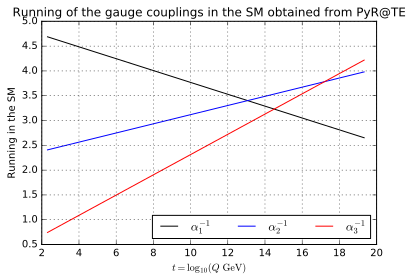

In [79]:
plot(rge.Sol['t'],rge.Sol['bg1']**-2*np.sqrt(3/5.)**2,'k',label=r'$\alpha_1^{-1}$')
plot(rge.Sol['t'],rge.Sol['bg_SU2']**-2,'b',label=r'$\alpha_2^{-1}$')
plot(rge.Sol['t'],rge.Sol['bg_SU3']**-2,'r',label=r'$\alpha_3^{-1}$')
grid(True)
xlabel('$t=\log_{10}(Q\ \mathrm{GeV})$')
ylabel('Running in the SM')
title('Running of the gauge couplings in the SM obtained from PyR@TE')
legend(loc=4,ncol=3)

In [80]:
#we can also have non diagonal terms in the Yukawas by setting the option 'diag' to False in the assumption dictionary
Y0[1] = 0.3
rge.solve_rges(tmin,tmax,tstep,assumptions={'two-loop': False,'diag':False})#Assumptions is here for customize purposes, see BetaFunction_SolveRGEs.py 

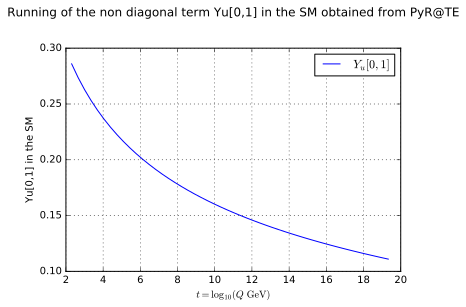

In [81]:
plot(rge.Sol['t'],rge.Solint['betaYu[0,1]'](rge.Sol['t']),label=r'$Y_u[0,1]$')
xlabel('$t=\log_{10}(Q\ \mathrm{GeV})$')
ylabel('Yu[0,1] in the SM')
title('Running of the non diagonal term Yu[0,1] in the SM obtained from PyR@TE\n\n')
legend(loc=1)
grid(True)